In [63]:
# !pip install torch==2.2.2 torchtext==0.17.2 nltk
# !pip install torchdata==0.7.1
# !pip install pyarrow
# !pip install tabulate
# !pip install seaborn

In [64]:
import torch
import os
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns
import numpy as np
from model import ClassificationNet, evaluate_epoch, save_list_to_file, load_list_from_file
from dataloader import get_dataloaders, DEVICE

In [50]:
train_dataloader, valid_dataloader, test_dataloader, vocab = get_dataloaders()

Loading data from Parquet files...
Loading existing vocabulary...
Vocabulary Size: 95811
Sorting data by text length to reduce padding...
Sorting data by text length to reduce padding...
Splitting training data into 110400 training and 9600 validation samples.


In [51]:
experiments = {
    'EXP_1_SGD': 'runs/initial',             
    'EXP_2_Adam_51_70': 'runs/adam_from_epoch51',
    'EXP_3_Adam_71_100': 'runs/adam_from_epoch71',
    'EXP_4_Adam_101_120': 'runs/adam_from_epoch101',
    'EXP_5_Adam_121_140': 'runs/adam_from_epoch121',
    'EXP_6_Adam_141_160': 'runs/adam_from_epoch141'
}

In [52]:
device = DEVICE
final_results = []
criterion = torch.nn.CrossEntropyLoss()

In [53]:
print("--- Starting Final Evaluation of All Best Models ---")

for exp_name, folder_path in experiments.items():
    print(f"\nProcessing experiment: '{exp_name}'")
    
    model_path = os.path.join(folder_path, 'best_model.pth')
    state_dict = torch.load(model_path, map_location=device)
    
    # a new model instance for each evaluation
    best_model = ClassificationNet(len(vocab), 4).to(device)
    best_model.load_state_dict(state_dict)
    
    # Evaluate on both validation and test sets
    val_loss, val_acc = evaluate_epoch(best_model, valid_dataloader, criterion, device)
    test_loss, test_acc = evaluate_epoch(best_model, test_dataloader, criterion, device)
    
    print(f"  -> Valid Loss: {val_loss:.4f} | Valid Accuracy: {val_acc*100:.2f}%")
    print(f"  -> Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc*100:.2f}%")
    
    final_results.append({
        'Experiment': exp_name,
        'Val Loss': round(val_loss, 4),
        'Val Accuracy (%)': round(val_acc * 100, 2),
        'Test Loss': round(test_loss, 4),
        'Test Accuracy (%)': round(test_acc * 100, 2)
    })

results_df = pd.DataFrame(final_results)
print("\n--- Final Results Summary ---")
print(results_df.to_markdown(index=False))

results_df.to_csv('final_evaluation_summary.csv', index=False)
print("\nResults saved to 'final_evaluation_summary.csv'")

--- Starting Final Evaluation of All Best Models ---

Processing experiment: 'EXP_1_SGD'


Evaluating: 100%|██████████| 119/119 [00:00<00:00, 186.48it/s, loss=0.6252]


  -> Valid Loss: 0.4418 | Valid Accuracy: 86.15%
  -> Test Loss: 0.6252 | Test Accuracy: 77.22%

Processing experiment: 'EXP_2_Adam_51_70'


Evaluating: 100%|██████████| 119/119 [00:00<00:00, 185.34it/s, loss=0.4669]


  -> Valid Loss: 0.4237 | Valid Accuracy: 86.31%
  -> Test Loss: 0.4669 | Test Accuracy: 85.45%

Processing experiment: 'EXP_3_Adam_71_100'


Evaluating: 100%|██████████| 119/119 [00:00<00:00, 184.32it/s, loss=0.3723]


  -> Valid Loss: 0.2817 | Valid Accuracy: 91.32%
  -> Test Loss: 0.3723 | Test Accuracy: 89.64%

Processing experiment: 'EXP_4_Adam_101_120'


Evaluating: 100%|██████████| 119/119 [00:00<00:00, 190.77it/s, loss=0.3434]


  -> Valid Loss: 0.2537 | Valid Accuracy: 91.92%
  -> Test Loss: 0.3434 | Test Accuracy: 89.97%

Processing experiment: 'EXP_5_Adam_121_140'


Evaluating: 100%|██████████| 119/119 [00:00<00:00, 190.75it/s, loss=0.3470]


  -> Valid Loss: 0.2352 | Valid Accuracy: 92.62%
  -> Test Loss: 0.3470 | Test Accuracy: 90.13%

Processing experiment: 'EXP_6_Adam_141_160'


Evaluating: 100%|██████████| 119/119 [00:00<00:00, 190.67it/s, loss=0.3405]


  -> Valid Loss: 0.2152 | Valid Accuracy: 93.09%
  -> Test Loss: 0.3405 | Test Accuracy: 90.32%

--- Final Results Summary ---
| Experiment         |   Val Loss |   Val Accuracy (%) |   Test Loss |   Test Accuracy (%) |
|:-------------------|-----------:|-------------------:|------------:|--------------------:|
| EXP_1_SGD          |     0.4418 |              86.15 |      0.6252 |               77.22 |
| EXP_2_Adam_51_70   |     0.4237 |              86.31 |      0.4669 |               85.45 |
| EXP_3_Adam_71_100  |     0.2817 |              91.32 |      0.3723 |               89.64 |
| EXP_4_Adam_101_120 |     0.2537 |              91.92 |      0.3434 |               89.97 |
| EXP_5_Adam_121_140 |     0.2352 |              92.62 |      0.347  |               90.13 |
| EXP_6_Adam_141_160 |     0.2152 |              93.09 |      0.3405 |               90.32 |

Results saved to 'final_evaluation_summary.csv'


In [54]:
all_experiments_data = {}

In [56]:
print("Loading all experiment artifacts...")
for exp_name, exp_path in experiments.items():
    print(f"\nProcessing: {exp_name}...")
    all_experiments_data[exp_name] = {}
    
    metrics_dir = os.path.join(exp_path, 'metrics')

    for metric_type in ['train_loss', 'train_acc', 'val_loss', 'val_acc']:
        file_path = os.path.join(metrics_dir, f"{metric_type}.pkl")
        with open(file_path, 'rb') as f:
            all_experiments_data[exp_name][metric_type] = pickle.load(f)
print("\n--- All artifacts loaded successfully! ---")

Loading all experiment artifacts...

Processing: EXP_1_SGD...

Processing: EXP_2_Adam_51_70...

Processing: EXP_3_Adam_71_100...

Processing: EXP_4_Adam_101_120...

Processing: EXP_5_Adam_121_140...

Processing: EXP_6_Adam_141_160...

--- All artifacts loaded successfully! ---


In [58]:
print("\nExample: First 5 values of training loss from the first experiment:")
print(all_experiments_data['EXP_1_SGD']['train_loss'][:5])

print("\nExample: Last 5 values of validation accuracy from the last experiment:")
print(all_experiments_data['EXP_6_Adam_141_160']['val_acc'][-5:])


Example: First 5 values of training loss from the first experiment:
[1.2368178251860797, 0.9234150259736655, 0.7938608471552531, 0.7207222115647965, 0.6722098074097564]

Example: Last 5 values of validation accuracy from the last experiment:
[0.9259375000000001, 0.9260416666666668, 0.9259375000000001, 0.9261458333333334, 0.9260416666666668]


In [60]:
results_df = pd.read_csv("final_evaluation_summary.csv")
results_df

,Experiment,Val Loss,Val Accuracy (%),Test Loss,Test Accuracy (%)
0,EXP_1_SGD,0.4418,86.15,0.6252,77.22
1,EXP_2_Adam_51_70,0.4237,86.31,0.4669,85.45
2,EXP_3_Adam_71_100,0.2817,91.32,0.3723,89.64
3,EXP_4_Adam_101_120,0.2537,91.92,0.3434,89.97
4,EXP_5_Adam_121_140,0.2352,92.62,0.3470,90.13
5,EXP_6_Adam_141_160,0.2152,93.09,0.3405,90.32


In [65]:
def plot_learning_curves(history, save_path='learning_curves.png'):
    """
    Plots the continuous training and validation learning curves from the full history.
    """
    sns.set_theme(style="whitegrid", palette="muted")
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), sharex=True)
    epochs = range(1, len(history['train_loss']) + 1)
    
    # phase boundaries
    boundaries = [50, 70, 100, 120, 140]

    # --- Plotting Loss ---
    ax1.plot(epochs, history['train_loss'], 'o-', color='royalblue', markersize=3, label='Training Loss')
    ax1.plot(epochs, history['val_loss'], 'o-', color='orangered', markersize=3, label='Validation Loss')
    ax1.set_ylabel('Loss', fontsize=14)
    ax1.set_title('Full Training Journey: Loss', fontsize=16, weight='bold')
    ax1.legend(fontsize=12)
    ax1.grid(True, which='both', linestyle='--')

    # --- Plotting Accuracy ---
    ax2.plot(epochs, history['train_acc'], 'o-', color='royalblue', markersize=3, label='Training Accuracy')
    ax2.plot(epochs, history['val_acc'], 'o-', color='orangered', markersize=3, label='Validation Accuracy')
    ax2.set_ylabel('Accuracy', fontsize=14)
    ax2.set_title('Full Training Journey: Accuracy', fontsize=16, weight='bold')
    ax2.set_xlabel('Epoch', fontsize=14)
    ax2.legend(fontsize=12)
    ax2.grid(True, which='both', linestyle='--')

    # Add vertical lines and text for phase transitions
    for boundary in boundaries:
        ax1.axvline(x=boundary, color='k', linestyle='--', linewidth=1.5)
        ax2.axvline(x=boundary, color='k', linestyle='--', linewidth=1.5)
        ax2.text(boundary + 1, np.mean(history['val_acc']), f' Phase Change', rotation=90, 
                 verticalalignment='center', color='black', weight='semibold')

    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Learning curves saved to {save_path}")
    plt.show()

In [66]:
def plot_comparative_bar_charts(results_df, save_path='comparative_performance.png'):
    """
    Creates two side-by-side bar plots for comparing accuracies and losses.
    """
    sns.set_theme(style="whitegrid")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    
    # --- Accuracy Bar Plot ---
    acc_df = results_df.melt(id_vars='Experiment', value_vars=['Val Accuracy (%)', 'Test Accuracy (%)'],
                             var_name='Metric', value_name='Accuracy')
    sns.barplot(ax=ax1, x='Accuracy', y='Experiment', hue='Metric', data=acc_df, palette='viridis', orient='h')
    ax1.set_title('Accuracy Comparison Across Phases', fontsize=16, weight='bold')
    ax1.set_xlabel('Accuracy (%)', fontsize=14)
    ax1.set_ylabel('Experiment Phase', fontsize=14)
    ax1.set_xlim(75, 95)
    ax1.legend(title='Metric Type')

    # Add labels to accuracy bars
    for p in ax1.patches:
        width = p.get_width()
        if width > 0:
            ax1.text(width + 0.1, p.get_y() + p.get_height() / 2,
                     f'{width:.2f}%', ha='left', va='center')

    # --- Loss Bar Plot ---
    loss_df = results_df.melt(id_vars='Experiment', value_vars=['Val Loss', 'Test Loss'],
                              var_name='Metric', value_name='Loss')
    sns.barplot(ax=ax2, x='Loss', y='Experiment', hue='Metric', data=loss_df, palette='mako', orient='h')
    ax2.set_title('Loss Comparison Across Phases', fontsize=16, weight='bold')
    ax2.set_xlabel('Loss', fontsize=14)
    ax2.set_ylabel('') # No need for a second Y-label
    ax2.legend(title='Metric Type')
    
    # Add labels to loss bars
    for p in ax2.patches:
        width = p.get_width()
        if width > 0:
            ax2.text(width + 0.005, p.get_y() + p.get_height() / 2,
                     f'{width:.4f}', ha='left', va='center')

    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Comparative bar charts saved to {save_path}")
    plt.show()

In [75]:
def clean_exp_name(name):
    parts = name.split('_')
    
    if len(parts) == 3 and parts[2] == 'SGD':
        return "SGD (1-50)"
    
    if len(parts) >= 5 and parts[2] == 'Adam':
        return f"Adam ({parts[3]}-{parts[4]})"
    
    return name

Learning curves saved to learning_curves.png


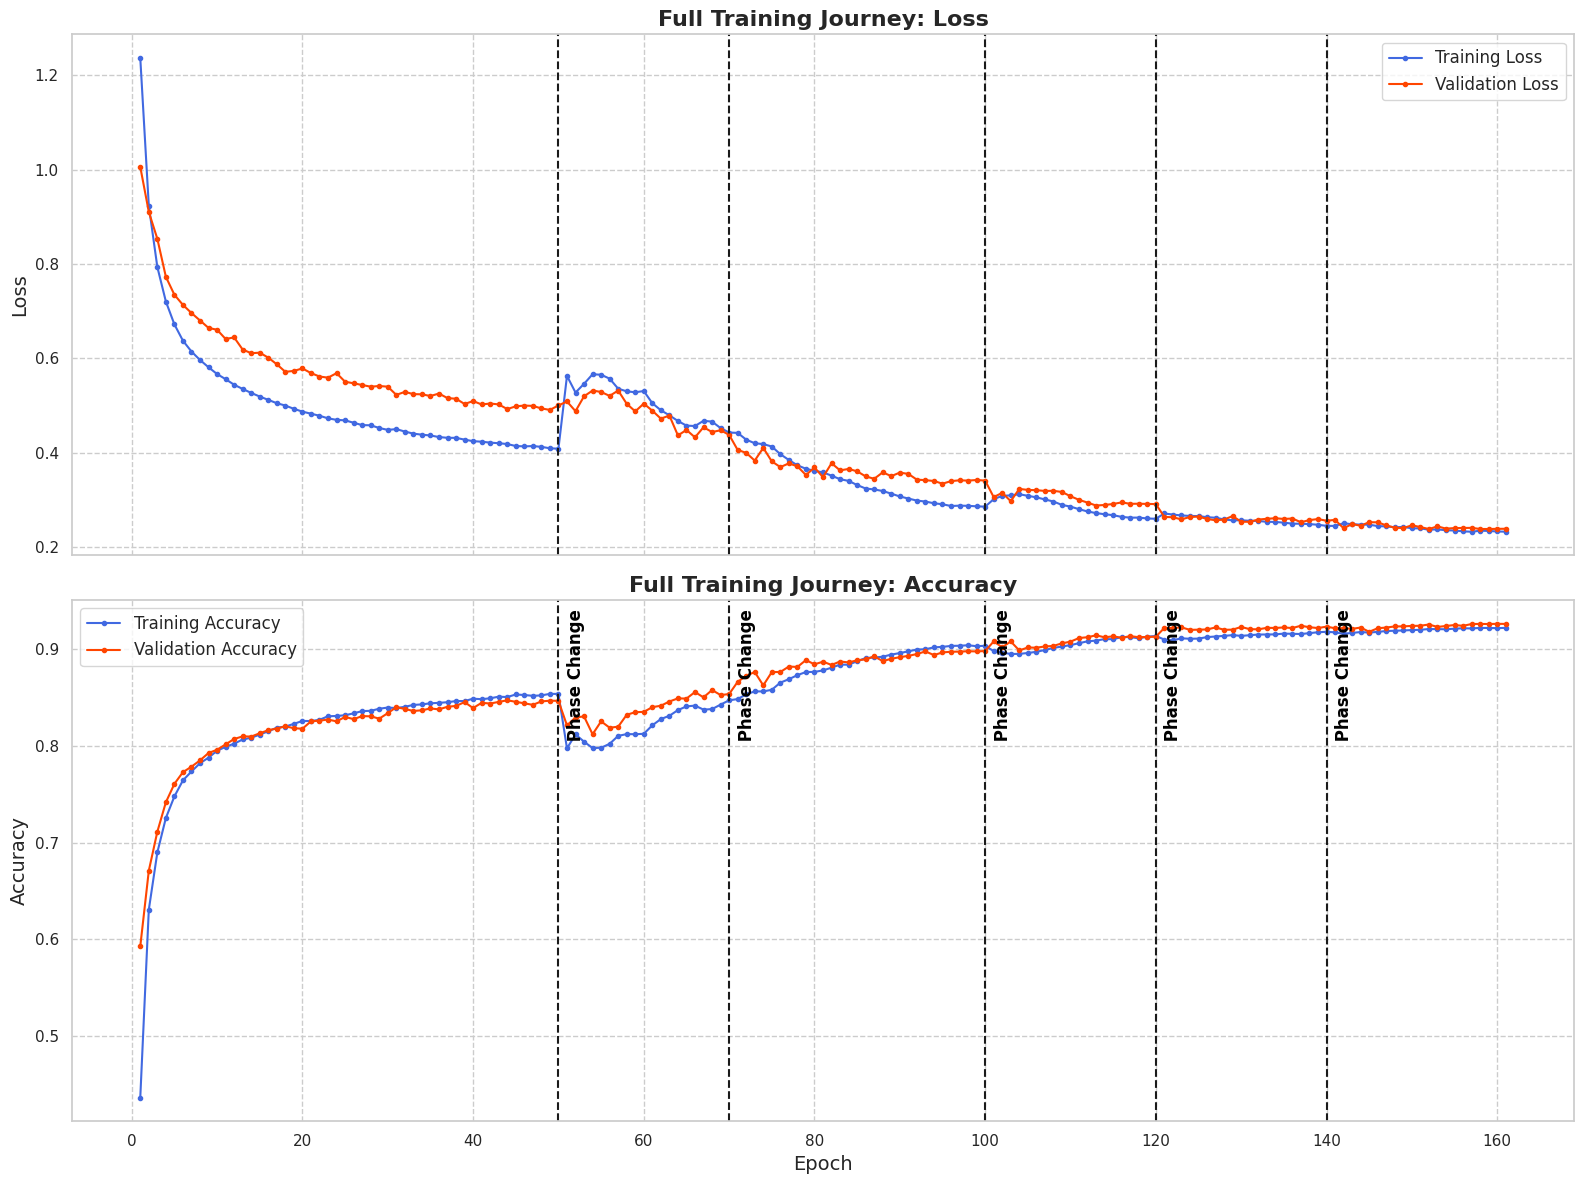

In [86]:
results_df = pd.read_csv("final_evaluation_summary.csv")
results_df['Experiment'] = results_df['Experiment'].apply(clean_exp_name)

final_experiment_key = 'EXP_6_Adam_141_160'
full_history = all_experiments_data[final_experiment_key]
plot_learning_curves(full_history)

Comparative bar charts saved to comparative_performance.png


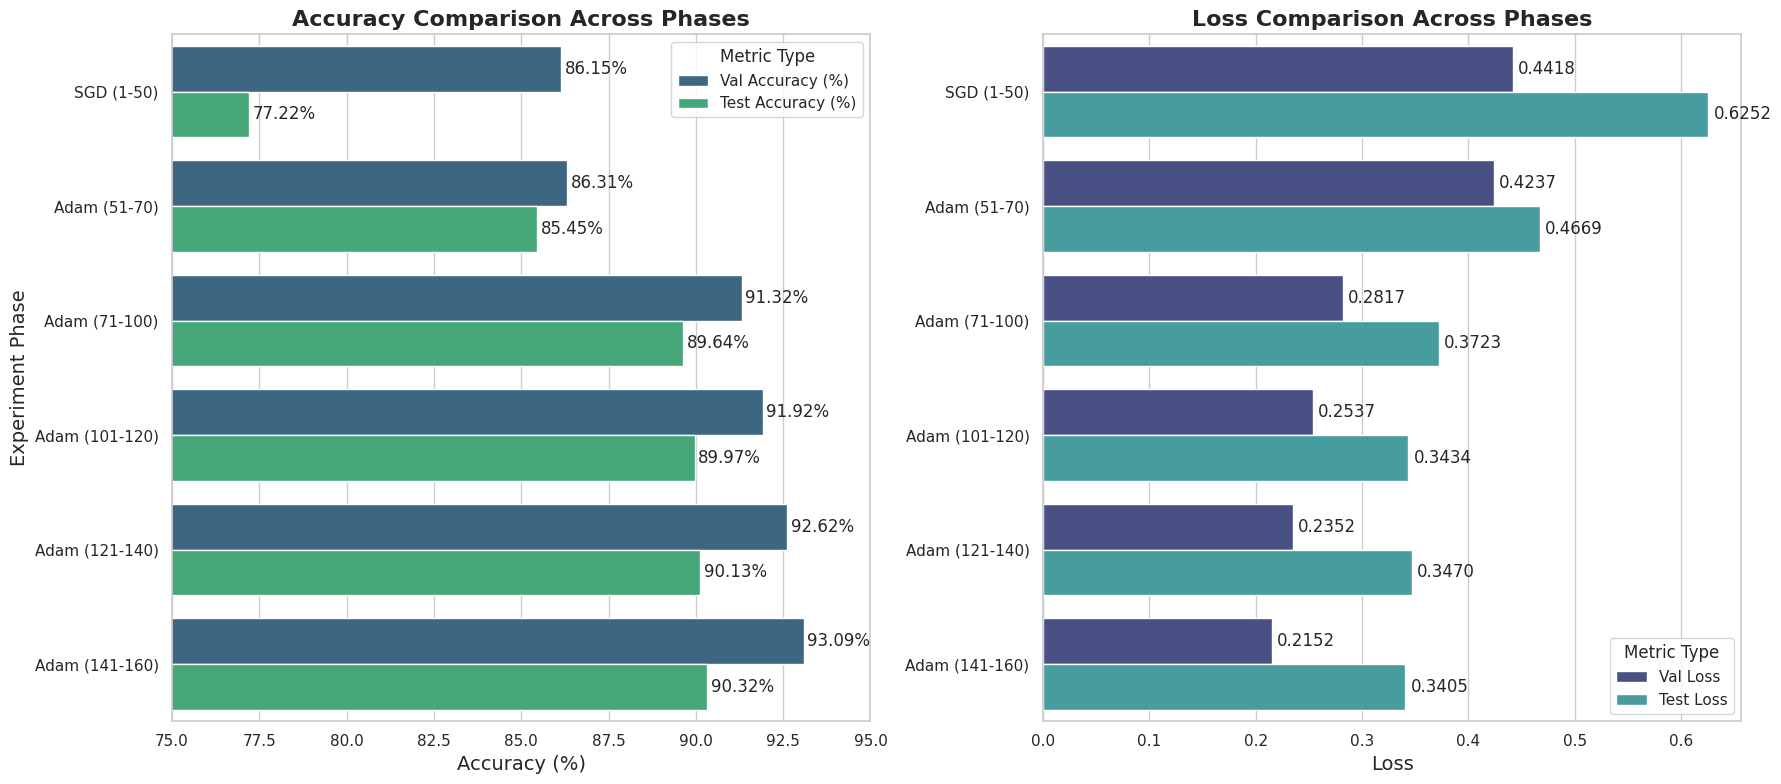

In [87]:
plot_comparative_bar_charts(results_df)